# Florida Course Enrollment
## District-level analysis

The source data can be found on the [FLDOE Publications and Reports page](http://www.fldoe.org/accountability/data-sys/edu-info-accountability-services/pk-12-public-school-data-pubs-reports/students.stml):
- Course Enrollment by School, Survey 3 2015-16 (5 .xls files)
- High School Completers, by school (.xls file)

The [FL Course Code Directory](http://www.fldoe.org/core/fileparse.php/7746/urlt/1617CCD-Basic9-12.pdf) lists each course, its numeric code, as well as credit and certification information.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# pull enrollment data
# created with FL_Science_datagen.ipynb
completers_orig = pd.read_csv('completers.csv', index_col=0)
takers_orig = pd.read_csv('takers.csv', index_col=0)

In [3]:
# Choose all Districts
completers1 = completers_orig
takers = takers_orig

# or select a single District
#completers = completers_orig.query('DISTRICT == "LEON"')
#takers = takers_orig.query('DISTRICT == "LEON"')

In [4]:
completers2 = completers1.groupby("DISTRICT").COMPLETERS.sum()
completers = pd.DataFrame()
completers['DISTRICT'] = completers2.index
completers['COMPLETERS'] = completers2.values

## Collect data

In [5]:
# Physics 1, Physics 1 Hon, and AP Physics 1
takersPHY1 = takers.query('COURSE_NUM == "2003380" \
    or COURSE_NUM == "2003390" \
    or COURSE_NUM == "2003421"').groupby("DISTRICT").TAKERS.sum()
PHY1 = pd.DataFrame()
PHY1['DISTRICT'] = takersPHY1.index
PHY1['PHY1_TAKERS'] = takersPHY1.values

# Chemistry 1 and Chemistry 1 Hon
takersCHEM1 = takers.query('COURSE_NUM == "2003340" \
    or COURSE_NUM == "2003350"').groupby("DISTRICT").TAKERS.sum()
CHEM1 = pd.DataFrame()
CHEM1['DISTRICT'] = takersCHEM1.index
CHEM1['CHEM1_TAKERS'] = takersCHEM1.values

# Earth/Space 1 and Earth/Space 1 Hon
takersES = takers.query('COURSE_NUM == "2001310" \
    or COURSE_NUM == "2001320"').groupby("DISTRICT").TAKERS.sum()
ES = pd.DataFrame()
ES['DISTRICT'] = takersES.index
ES['ES_TAKERS'] = takersES.values

# Physical Science 1 and Physical Science 1 Hon
takersPS = takers.query('COURSE_NUM == "2003310" \
    or COURSE_NUM == "2003320"').groupby("DISTRICT").TAKERS.sum()
PS = pd.DataFrame()
PS['DISTRICT'] = takersPS.index
PS['PS_TAKERS'] = takersPS.values

df = completers.merge(PHY1, on="DISTRICT", how='left')
df = df.merge(CHEM1, on="DISTRICT", how='left')
df = df.merge(ES, on="DISTRICT", how='left')
df = df.merge(PS, on="DISTRICT", how='left')

df['PCT_PHY1_TAKERS'] = df.PHY1_TAKERS/df.COMPLETERS
df['PCT_CHEM1_TAKERS'] = df.CHEM1_TAKERS/df.COMPLETERS
df['PCT_ES_TAKERS'] = df.ES_TAKERS/df.COMPLETERS
df['PCT_PS_TAKERS'] = df.PS_TAKERS/df.COMPLETERS

df1 = df.fillna(0, inplace=False)

## Plot course enrollment, by District

In [12]:
df = df1.sort_values(by="DISTRICT", ascending=False)
df = df[df.DISTRICT.str.contains("VIRTUAL") == False] # Drop a District from the set

#df = df[df.COMPLETERS > 99]
#df = df[(df['PCT_FEMALE_(W)'] + df['PCT_MALE_(W)']) < .25]
#df = df[df['PCT_PHY1_TAKERS'] > .5]
#df = df[df['PCT_CHEM1_TAKERS'] > .5]
#df = df[df['PCT_ES_TAKERS'] > .5]

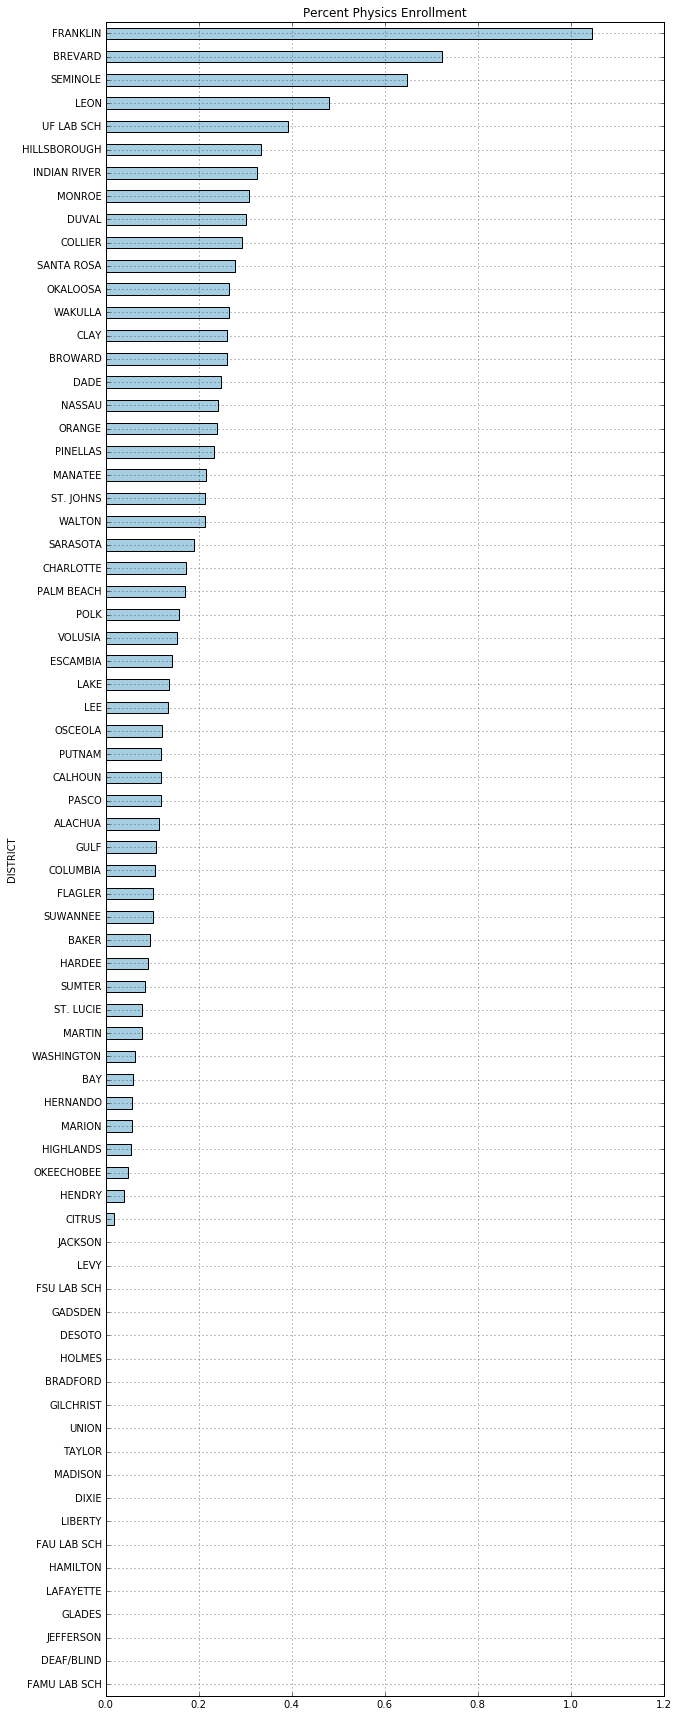

In [27]:
df = df.sort_values(by="PCT_PHY1_TAKERS", ascending=True)
plotdata = df[['DISTRICT' \
#               , 'PCT_PS_TAKERS' \
#               , 'PCT_ES_TAKERS' \
#               , 'PCT_CHEM1_TAKERS' \
               , 'PCT_PHY1_TAKERS' \
              ]]
plotdata.plot(x=df.DISTRICT, kind='barh', title="Percent Physics Enrollment", figsize=(10,30), grid=True, legend=False, colormap='Paired')

In [15]:
df = df.sort_values(by="COMPLETERS", ascending=True)
df.head()

,DISTRICT,COMPLETERS,PHY1_TAKERS,CHEM1_TAKERS,ES_TAKERS,PS_TAKERS,PCT_PHY1_TAKERS,PCT_CHEM1_TAKERS,PCT_ES_TAKERS,PCT_PS_TAKERS
18,FAMU LAB SCH,32,0.0,25.0,0.0,0.0,0.000000,0.781250,0.0,0.000000
37,JEFFERSON,33,0.0,0.0,0.0,111.0,0.000000,0.000000,0.0,3.363636
13,DEAF/BLIND,36,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
22,FRANKLIN,43,45.0,21.0,0.0,0.0,1.046512,0.488372,0.0,0.000000
26,GLADES,47,0.0,26.0,0.0,83.0,0.000000,0.553191,0.0,1.765957


## Next up ...
- better colors for bar chart; use gradual progression for ES -> CHEM -> PHY?
- display as %
- include target % in legend, and as line?
- get same-year data
- this is too much on a single graph
- generate plot for each district and save image, use groupby "DISTRICT"?